<center> 

# Trial 1 Active Sampling on Binary Classification using Logistic Regression

## Week - 1

### Team 21 NIT W B.Tech Proj </center>

Firstly, one should import the libraries will be used in the assignment. 

In [278]:
import numpy as np
import matplotlib.pyplot as plt

The parameters for the assignment is below. These parameters can be adjusted as desired.

#### Denotations
- dataset_name: File name of the dataset.
- lr: Desired learning rate. Please note that adjusting learning rate is crucial. If the learning rate is too low, the model can stuck in a local optima and/or takes long to converge. Too high learning rate obstruct the convergence.
- batch_size: Desired batch size for mini batches.
- n_iterations: Maximum number of iterations if no convergence is detected.
- patience: Desired patience level for convergence detection. The usage of this parameter is explained at the corresponding markdown section.
- min_delta: Desired threshold level for convergence detection. The usage of this parameter is explained at the corresponding markdown section.

P.S: Please note that dataset file should be located at the root directory of this notebook file.

In [279]:
dataset_name = "ionosphere.data"

lr = .1
batch_size = 16
n_iterations = 10000
# 10000 ^
patience = 2
min_delta = 1e-2

Development of a logistic regression model was assigned in this assignment. The general formulation of logistic regression is like the equation below.

<h3><center> $ f(x) = \sigma(\beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + ... + \beta_n * x_n) $ </center></h3>


The equation above refers to a set of parameters($\beta_i$) being multiplied by predictors (also known as features) from each example and going through from an activation function which is called "sigmoid" function.

Logistic regression is a method that is being used for classification. It uses a similar (but not the same) mathematical approach as linear regression method. Each example in dataset is expected to have some number of predictors and a class value. Predictors are the inputs of constructed function that will be used for make predictions. They are being expected to contain valuable information about class predictions each example belongs to. In this assignment this class values are binary as datasets contain only 2 different classes. 

As mentioned before, logistic regression is a method for classification. Hence, it is expected to output a value which is a probability. Because of that reason, unlike linear regression, an activation function called "sigmoid function" is employed for the output. Mathematical expression of the sigmoid function is shown below.

<h3><center> $ h(z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z} }  $ </center></h3>

The sigmoid function is implemented as a lambda function which is located at below.

In [280]:
sigmoid = lambda z : 1 / (1 + np.exp(-z))

A loss function should be implemented for the training process. A loss function is used for measuring how good a trained model performing. Logarithmic loss (log-likelihood) function is implemented for this assignment. Logarithmic loss function is widely employed for classification tasks because of ease of computation and being a good measure for how confident the model of its predictions. Logarithmic loss function is implemented as a lambda function which can be seen below.

In [281]:
logloss = lambda y_hat, y : np.sum(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / len(y_hat)

Gradient descent is widely used for any kind of model training task. Gradient descent method simply computes the gradients of the predictors, and that computed gradients is used for moving towards an optimal solution. The gradient descent function can be constructed from the derivative of the model function for each predictor. The simplifed version of computed gradients is shown in the equation below.

<h3><center> $ \frac{\delta J(\beta)}{\delta\beta_p} = \frac{1}{m} * X^T(\sigma(X * \beta) - y)$ </center></h3>

The equation above is a vectorized implementation of partial derivations (gradients) of each predictors which is meant to make the computation process faster. For the sake of computational speed enhancement, all gradients are calculated in a single series of matrix operations. "y" denotes the ground truth obtained from dataset and "m" denotes the number of samples.

Calculated gradients are multiplied with a factor which is called "learning rate" in order to make sure the model is learning at a desired speed and summed or substracted with the current predictors(depends on if it's a maximization or minimization task). Increasing learning rate too much may lead the model not to learn. Decreasing it too much may cause a slow learning rate and in some conditions (non-convex loss for the given dataset) may lead to converge to a local optima.

The implemented gradient descent method is located at below.

In [282]:
def gradient_descent(X, y, beta, lr):
    y = y.reshape(-1, 1)
    gradients = np.dot(X.T, sigmoid(np.dot(X, beta.T)) - y) / len(y)
    new_betas = beta - lr * gradients.T

    return new_betas

In the assignment it's been told that a mini-batch gradient descent should be employed. With this method, instead of calculating gradients for the full dataset, the given dataset is divided into batches. Each batch contains the same number of samples. Thus, one should split the dataset into mini-batches for the learning process. The function implemented for preparing batches task is located at below.

In [283]:
def prepare_batches(X, y, batch_size):
    X_batch_list = list()
    y_batch_list = list()
    
    for i in range(len(y) // batch_size):
        X_batch_list.append(X[i * batch_size : i * batch_size + batch_size, :])
        y_batch_list.append(y[i * batch_size : i * batch_size + batch_size])
    
    if len(y) % batch_size > 0:
        X_batch_list.append(X[len(y) // batch_size * batch_size:, :])
        y_batch_list.append(y[len(y) // batch_size * batch_size:])

    return X_batch_list, y_batch_list

In order to make predictions after the training process, a prediction function should be implemented. Since the model outputs a probability, one can determine a threshold at 0.5 and predict 1 if the predicted probability greater than that threshold and predict 0 if it's the otherwise. The implementation of prediction function is located at below. 

In [284]:
predict = lambda X: sigmoid(np.dot(X, betas.T)) > .5
predict_with_output = lambda X: (X > .5) * 1

Before the training process, the dataset should be imported. The code for importing dataset is located below. The code below can successfully import any dataset that has the same structure with the datasets given. 

P.S: Please note that the ground truth of each dataset can vary. Since it's known that both of the datasets consist binary classes, a function called "encoder" is employed to cast the dataset char into 0 and 1 values.

In [285]:
f = open(dataset_name, "r")

X = list()
y = list()

encode_char = ""
encoder = lambda y : 0 if y is encode_char else 1

gg = 0
bb = 0

X_train_g = list()
X_train_b = list()
y_train_g = list()
y_train_b = list()

for row in f:
    split_row = [x.strip() for x in row.split(',')]
    if encode_char == "":
        encode_char = split_row[-1]
        
    y.append(encoder(split_row[-1]))
    X.append([np.array(split_row[:-1]).astype(np.float)])
#     print(type(X))
    if y[-1] == 0:
        gg = gg + 1
#         y_g.append(encoder(split_row[-1]))
#         X_g.append([np.array(split_row[:-1]).astype(np.float)])
    else:
#         y_b.append(y[-1])
#         X_b.append(X[-1])
#         y_b.append(encoder(split_row[-1]))
#         X_b.append([np.array(split_row[:-1]).astype(np.float)])

        bb = bb + 1
        
print(gg, bb)
        

225 126


If it is desired, the dataset's feature matrix and ground truth vector can be seen with the code below. For simplicity, the whole dataset is not used for this purpose. One can change the corresponding index and see other samples' feature matrices and ground truths too.

In [286]:
permus = np.array([11, 192, 248, 181, 6, 44, 230, 91, 292, 318, 127, 146, 116, 328, 228, 109, 234, 185, 287, 282, 198, 115, 26, 40, 147, 278, 266, 270, 82, 9, 51, 120, 49, 261, 212, 113, 226, 23, 343, 227, 242, 14, 191, 257, 233, 221, 55, 46, 321, 279, 223, 337, 299, 294, 309, 317, 254, 224, 271, 308, 25, 75, 217, 132, 350, 112, 142, 152, 165, 45, 205, 161, 239, 103, 97, 16, 93, 333, 43, 313, 315, 13, 117, 94, 119, 129, 286, 90, 92, 68, 267, 341, 134, 111, 311, 274, 322, 125, 20, 118, 272, 124, 218, 149, 107, 252, 264, 195, 190, 47, 145, 276, 346, 157, 178, 207, 320, 156, 323, 201, 138, 151, 63, 137, 3, 184, 306, 60, 50, 194, 131, 335, 310, 136, 250, 166, 244, 73, 304, 260, 265, 110, 71, 197, 340, 69, 290, 203, 246, 186, 72, 58, 108, 284, 29, 140, 122, 263, 222, 154, 78, 66, 87, 0, 174, 123, 345, 7, 173, 128, 102, 241, 12, 95, 297, 326, 177, 275, 143, 243, 236, 319, 231, 135, 126, 342, 349, 56, 114, 84, 27, 249, 101, 153, 327, 258, 4, 172, 232, 32, 62, 196, 255, 213, 160, 262, 144, 133, 33, 336, 300, 30, 170, 79, 268, 31, 344, 105, 256, 83, 209, 130, 18, 291, 225, 280, 163, 210, 348, 330, 193, 61, 188, 295, 183, 293, 176, 22, 34, 150, 169, 67, 100, 182, 180, 237, 303, 168, 220, 235, 53, 64, 86, 74, 15, 214, 200, 57, 283, 171, 331, 187, 211, 216, 148, 240, 339, 96, 104, 1, 288, 139, 81, 19, 85, 48, 39, 98, 24, 307, 164, 206, 65, 5, 59, 281, 80, 277, 219, 155, 162, 314, 325, 316, 189, 208, 229, 298, 273, 52, 215, 89, 54, 289, 77, 70, 204, 179, 324, 347, 167, 247, 42, 2, 334, 312, 296, 41, 38, 36, 259, 251, 99, 158, 238, 332, 17, 8, 35, 302, 37, 28, 121, 285, 21, 269, 76, 301, 159, 88, 305, 175, 141, 329, 10, 199, 106, 338, 202, 253, 245])

The dataset should be divided into 2 sub-datasets, training and test datasets. Before the division process, the dataset is shuffled in order to ensure both datasets contain samples from both of the classes.

2 sub-datasets are also divided into 2 new sets, feature matrix and ground truth vector.

In [287]:
# permutations = np.random.permutation(len(X))
permutations = permus
X, y = np.asarray(X).squeeze(), np.asarray(y)

X = X[permutations, :]
y = y[permutations]

#To add beta 0
temp = np.ones((X.shape[0], X.shape[1] + 1))
temp[:, 1:] = X
X = temp

len_test = len(X) // 5 
len_train = len(X) - len_test
X_test, y_test, X_train, y_train = X[:len_test, :], y[:len_test], X[len_test:, :], y[len_test:]

for itr in range(len(X_train)) :
    if y_train[itr]==1:
        X_train_b.append(X_train[itr])
        y_train_b.append(y_train[itr])
    else:
        X_train_g.append(X_train[itr])
        y_train_g.append(y_train[itr])
        

# print(X_b[0])
# print(y_b[0])
# print(X_g[0])
# print(y_g[0])


Please note that the integer of "1" is padded at the beggining of the dataset. This can be an efficient implementation for calculating the $\beta_0$ predictor since that implementation requires one less sum. (For example, without the padding process, prediction function should be like "predict = lambda X: sigmoid(np.dot(X, betas.T) + beta_zero) > .5") 

The shapes of the constructed predictor matrices and ground truth vectors can be seen with the code below. It is a good practice to check the outputs and matrix shapes before moving on. Desired samples' predictor vector and ground truth can also be seen with the code below. 

In [288]:
print("Shape of X matrix is: " + str(X.shape))
print("Shape of y matrix is: " + str(y.shape))
print("Shape of X_test matrix is: " + str(X.shape))
print("Shape of y_test matrix is: " + str(X.shape))
print("Shape of X_train matrix is: " + str(X.shape))
print("Shape of y_train matrix is: " + str(X.shape))

print("Desired samples feature vector: " + str(X[2]))
print("Desired samples ground truth: " + str(y[2]))

X_train_g, y_train_g = np.asarray(X_train_g).squeeze(), np.asarray(y_train_g)
X_train_b, y_train_b = np.asarray(X_train_b).squeeze(), np.asarray(y_train_b)


Shape of X matrix is: (351, 35)
Shape of y matrix is: (351,)
Shape of X_test matrix is: (351, 35)
Shape of y_test matrix is: (351, 35)
Shape of X_train matrix is: (351, 35)
Shape of y_train matrix is: (351, 35)
Desired samples feature vector: [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.]
Desired samples ground truth: 1


The initialization of predictors should be before the training process. There are various types of initialization for predictors in the literature. One can simply initialize the predictors with uniform random decimals ranging from 0 to 1. In this implementation, a uniform random initialization is employed as below.

In [289]:
betas = np.random.random(X_train_g.shape[1]).reshape(1, -1)
print(betas.shape)

(1, 35)


Employed strategy to stop-training is as follows:
- Collect test error values for each iteration.
- Average test error values collected from a full pass of the whole train set (simply for all mini batches). This process might be necessary since mini-batch gradient descent can cause small oscilations.
- Observe that average for each whole train pass if it's changed for a desired minimum delta over iterations or not. 
- If it's not, wait for a patience number to see if it's decreased further.
- If the patience number is exceeded, assume the model as it's converged to an optimum point.

The trained model is expected to generalize the data well and will be tested on the test dataset. Obviously, training procedure for model is being conducted on train dataset. However, the model can overfit on the training dataset and this condition should be checked since it prevents the model to generalize the data. Hence, in training stage, the model should have no relation for training since the model will be tested on the test set if it generalized the data well or not.

The training process is as follows:
- Mini batches preperation
- Iteration phase:
    - Calculation of new predictors with gradient descent for each mini batch.
    - Calculation of models current error with logloss function with train set
    - Calculation of models current error with logloss function with test set
    - Check if the model is converged with the employed stop-training strategy.
    - If the model convergance takes a large number of iteration, stop it at a desired iteration number.
    
The code is located below.

In [290]:
def extract_batch(X_ , ptr, allot_num ):
    try:
        x = X_[ptr:ptr+allot_num, :]
    except:
        x = X_[ptr:, :]
    return x

def eval_ratios(X_g, X_b, y_g, y_b, betas):
    # g
    y_hat = sigmoid(np.dot(X_g, betas.T))
    test_error_g = logloss(y_hat, y_g) / len(y_g)
    test_acc_g = np.mean((predict_with_output(y_hat) == y_g.reshape(-1, 1)) * 1)
    
    # b
    y_hat = sigmoid(np.dot(X_b, betas.T))
    test_error_b = logloss(y_hat, y_b) / len(y_b)
    test_acc_b = np.mean((predict_with_output(y_hat) == y_b.reshape(-1, 1)) * 1)
    
    return 1-test_acc_g+0.1 , 1-test_acc_b+0.1
    
# 200  150 dogs 50
# 20
#     10d -> 4 correct 6 wrong ->0.4 (1-0.4)
#     10c -> 2 correct 8 wrong ->0.2 (1-0.2)
    
    
#     1.1 0.1
#     cr = c/(c+d)
#     dr = d/(c+d)
    
#     0.1/1.2
#     1.1/1.2
    
#     =1.2
    


In [291]:
train_error_hist = list()
test_error_hist = list()
test_acc_hist = list()

X_batch_list, y_batch_list = prepare_batches(X_train, y_train, batch_size)

n_batches = len(y_batch_list)

prev_average = 10000

patience_counter = 0
iteration_counter = 0 



ratio_g = 1
ratio_b = 1
best_betas = betas
max_acc = 0
    
while iteration_counter < 10000:
    ptr_g = 0
    ptr_b = 0

    allot_num_g = 1
    allot_num_b = 1
    
    
    for i in range(n_batches):
        # allot batches based on ratios and ptrs
        allot_num_g = ( ratio_g / (ratio_g + ratio_b) )*batch_size
        allot_num_g = (int)(allot_num_g)
        
        allot_num_b = batch_size - allot_num_g
#         print("Allot numbers are: ", allot_num_g, allot_num_b)
        
#         print(type(X_train_g), X_train_g.shape)
#         print("Function Preques: ", ptr_g, allot_num_g)
        X_batch = X_train_g[ ptr_g: ptr_g+allot_num_g , :]
        tempp = X_train_b[ ptr_b: ptr_b+allot_num_b , :]

        X_batch = np.concatenate((X_batch, tempp), axis=0)
        

        y_batch = y_train_g[ ptr_g: ptr_g+allot_num_g]
        tempp = y_train_b[ ptr_b: ptr_b+allot_num_b]
        
        y_batch = np.concatenate((y_batch, tempp), axis=0 )
        
#         print("X: ", type(X_batch),X_batch.shape )
#         print("y: ", type(y_batch),y_batch.shape )
            
        betas = gradient_descent(X_batch, y_batch, betas, lr)
        
        y_hat = sigmoid(np.dot(X_batch, betas.T))
        train_error_hist.append( logloss(y_hat, y_batch) / len(y_batch) )
           
        y_hat = sigmoid(np.dot(X_test, betas.T))
        test_error_hist.append(logloss(y_hat, y_test) / len(y_test))
        test_acc_hist.append( np.mean((predict_with_output(y_hat) == y_test.reshape(-1, 1)) * 1))
#         print(np.mean((predict_with_output(y_hat) == y_test.reshape(-1, 1)) * 1))
#         print(test_acc_hist[-1])
        if test_acc_hist[-1] > max_acc:
            max_acc = test_acc_hist[-1]
            best_betas = betas
        
        iteration_counter += 1
        
        # calculate how well the model doing in each g,b batch or check in the test g,b batch and update the ratios...
        ratio_g, ratio_b = eval_ratios(X_train_g, X_train_b, y_train_g, y_train_b, betas)
#         print("Ratios: ", ratio_g, ratio_b)
        ptr_g += allot_num_g
        ptr_b += allot_num_b
        
#     current_average = np.mean(train_error_hist[-n_batches:])
        
#     if np.abs(prev_average - current_average) < min_delta:
#         patience_counter += 1
#     else:
#         patience_counter = 0
        
#     prev_average = current_average
    
#     if patience_counter == patience:
#         break

The model's performance is being tracked in terms of the determined loss function during training. ("train_error_hist" and "test_error_hist") The performance plot on both sets is located below.

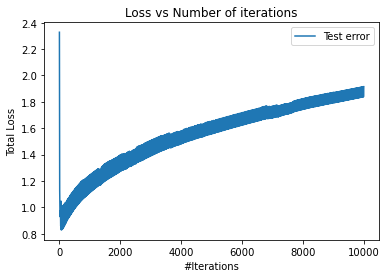

In [296]:
plt.plot(test_error_hist)
# plt.plot(train_error_hist)
plt.xlabel("#Iterations")
plt.ylabel("Total Loss")
plt.title("Loss vs Number of iterations")
plt.legend(("Test error", "Train error"))

Finally, the accuracy of the model on the test dataset is located below.

Text(0.5, 1.0, 'Accuracy vs Number of iterations')

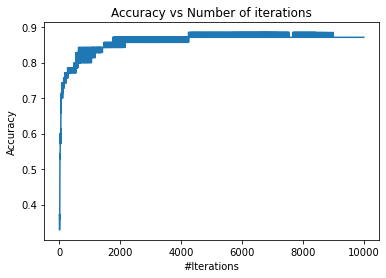

In [293]:
plt.plot(test_acc_hist)
plt.xlabel("#Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of iterations")

In [294]:
print(np.max(test_acc_hist))

0.8857142857142857


In [295]:
print(test_acc_hist[-1])

0.8714285714285714


In [310]:
# y_pred = model1.predict(scaled_x_test)
from sklearn.metrics import classification_report, confusion_matrix
def myfunc(x):
    if x<0.5:
        return 0
    return 1

y_hat = sigmoid(np.dot(X_test, best_betas.T))
y_hat = y_hat.T[0]
# print(y_hat)
for i in range(len(y_hat)):
    y_hat[i] = myfunc(y_hat[i])
# print(y_hat)
# print(logloss(y_hat, y_test))
print(classification_report(y_test, y_hat))
print(confusion_matrix(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        43
           1       1.00      0.70      0.83        27

    accuracy                           0.89        70
   macro avg       0.92      0.85      0.87        70
weighted avg       0.90      0.89      0.88        70

[[43  0]
 [ 8 19]]


In [311]:
# print(test_acc_hist)

[0.37142857142857144, 0.37142857142857144, 0.35714285714285715, 0.35714285714285715, 0.37142857142857144, 0.35714285714285715, 0.32857142857142857, 0.35714285714285715, 0.34285714285714286, 0.37142857142857144, 0.37142857142857144, 0.35714285714285715, 0.38571428571428573, 0.45714285714285713, 0.4714285714285714, 0.5, 0.5142857142857142, 0.5285714285714286, 0.5428571428571428, 0.5285714285714286, 0.5428571428571428, 0.5285714285714286, 0.5285714285714286, 0.5285714285714286, 0.5285714285714286, 0.5428571428571428, 0.5285714285714286, 0.5571428571428572, 0.5714285714285714, 0.6, 0.5714285714285714, 0.5714285714285714, 0.6, 0.5857142857142857, 0.5857142857142857, 0.5857142857142857, 0.6, 0.6, 0.5714285714285714, 0.5857142857142857, 0.6, 0.6, 0.6, 0.6142857142857143, 0.6142857142857143, 0.5714285714285714, 0.5714285714285714, 0.6285714285714286, 0.6571428571428571, 0.6714285714285714, 0.7, 0.7, 0.6571428571428571, 0.6571428571428571, 0.7, 0.6857142857142857, 0.6857142857142857, 0.7, 0.7, 